<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 3</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @mh_momeni  -  Question 2,3: @Mahdi_h721 </font> </h5>


You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

##  Q1. Implementing QR Factorization <sub><sup>``(40 pt.)``</sup></sub>

>In this question, we are going to use QR factorization in computing eigenvalues. It is an important building block in numerical linear algebra. Recall that for any matrix $A$
, $A=QR$
 where $Q$
 is orthogonal and $R$
 is upper-triangular.

 **Reminder**: The QR algorithm, uses the QR decomposition, but don't confuse the two.

In [1]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)

In [2]:
n = 5
A = np.random.rand(n,n)
npQ, npR = np.linalg.qr(A)

Check that Q is orthogonal:


In [3]:
np.allclose(np.eye(n), npQ @ npQ.T), np.allclose(np.eye(n), npQ.T @ npQ)

(True, True)

Check that R is triangular

In [4]:
npR

array([[-1.1219, -0.867 , -1.1237, -0.4592, -0.9323],
       [ 0.    ,  0.2387,  0.0778,  0.0829,  0.7509],
       [ 0.    ,  0.    , -0.9372, -0.7141, -0.6696],
       [ 0.    ,  0.    ,  0.    ,  0.4225,  0.368 ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.3865]])

### Gram-Schmidt

#### Classical Gram-Schmidt (unstable)

For each $j$
, calculate a single projection

$$v_j=P_ja_j$$

where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

In [5]:
def cgs(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    
    for j in range(n):
        v = A[:, j].copy()
        for i in range(j):
            R[i, j] = Q[:, i] @ A[:, j]
            v -= R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]
        
    return Q, R


In [6]:
Q, R = cgs(A)
np.allclose(A, Q @ R)


True

Check if Q is unitary:

In [7]:
np.allclose(np.eye(len(Q)), Q.dot(Q.T))

True

### Modified Gram-Schmidt (optional)

Classical (unstable) Gram-Schmidt: for each $j$
, calculate a single projection
$$v_j=P_ja_j$$
where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

Modified Gram-Schmidt: for each $j$
, calculate $j−1$
 projections
$$P_j=P_{⊥q_{j−1}⋯⊥q_2⊥q_1}$$

In [8]:
n = 3
A = np.random.rand(n,n).astype(np.float64)

In [9]:
def mgs(A):
    V = A.copy()
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    
    for j in range(n):
        for i in range(j):
            R[i, j] = Q[:, i] @ V[:, j]
            V[:, j] -= R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(V[:, j])
        Q[:, j] = V[:, j] / R[j, j]
        
    return Q, R


In [10]:
Q, R = mgs(A)
np.allclose(np.eye(len(Q)), Q.dot(Q.T.conj()))


True

In [11]:
np.allclose(A, np.matmul(Q,R))

True

### Classical vs Modified Gram-Schmidt

In this part, we want to construct a square matrix $A$ with random singular vectors and widely varying singular values spaced by factors of 2 between $2^{−1}$
 and $2^{−(n+1)}$

In [12]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [13]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))   # set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))   # set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1), dtype=float))  # Set S to a diagonal matrix w/ exp
                                                              # values between 2^-1 and 2^-(n+1)

In [14]:
A = np.matmul(U,np.matmul(S,V))
QC, RC = cgs(A)
QM, RM = mgs(A) # if you don't complete the mgs function, comment this line

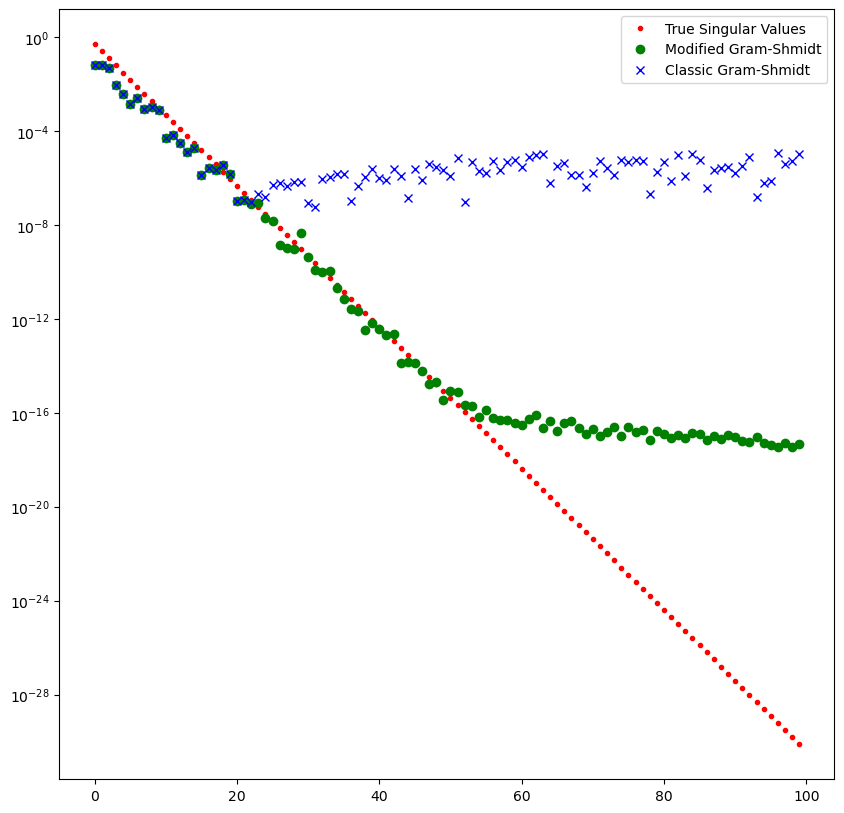

In [15]:
plt.figure(figsize=(10,10))
plt.semilogy(np.diag(S), 'r.', label="True Singular Values")
plt.semilogy(np.diag(RM), 'go', label="Modified Gram-Shmidt")
plt.semilogy(np.diag(RC), 'bx', label="Classic Gram-Shmidt")
plt.legend()
rcParams.update({'font.size': 18})

### Eigenvalue Decomposition using QR Factorization

Use the QR algorithm (or QR method) to get the eigenvalues of matrix $A$. Do 100 iterations, and print out the 1st, 5th, 10th, 20th and 100th iteration.

 **Reminder**: The QR algorithm (or QR method), uses the QR factorization, but don't confuse the two.

In [16]:
##Your Code start here

def qr_algorithm(A, iterations):
    
    for i in range(iterations):
        Q, R = np.linalg.qr(A)
        A = R @ Q
        
    return np.diag(A)


##Your Code ends here

In [17]:
A = np.array([1.0, -1.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0]).reshape((4, 4))
print("The matrix: \n", A)

print("\n --- Built-in ---")
print(np.linalg.eig(A)[0])
##Your Code start here
qr_algorithm(A,100)
iterations = [1,5,10,20,100]
for i in iterations :
    print("Eigenvalues for ",i," iterations : ",np.sort(qr_algorithm(A, i)))

##Your Code ends here

The matrix: 
 [[ 1. -1.  0.  0.]
 [-1.  1. -1.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  0.  0.  3.]]

 --- Built-in ---
[-0.247   1.445   2.8019  3.    ]
Eigenvalues for  1  iterations :  [0. 2. 2. 3.]
Eigenvalues for  5  iterations :  [-0.247   1.4541  2.7929  3.    ]
Eigenvalues for  10  iterations :  [-0.247   1.4451  2.8019  3.    ]
Eigenvalues for  20  iterations :  [-0.247   1.445   2.8019  3.    ]
Eigenvalues for  100  iterations :  [-0.247   1.445   2.8019  3.    ]


##  Q2. SVD & Image processing <sub><sup>``(30 pt.)``</sup></sub>

> In this question, we are going to investigate the use of SVD as a tool to obtain the basis of the matrix in digital image processing.
The first issue we will examine is image compression. For this purpose, in general, we can consider the information inside the image as a data matrix, then find a suitable basis for this information matrix and by depicting the primary matrix on the more important basis vectors and keeping the necessary information to show the initial image with less information.
This process results in image compression. It should be noted that for simplicity, the images we are examining in this exercise are in black and white.
>With the help of SVD, we can find a basis for the column space of the image matrix that we want, so that the columns of the image matrix have the highest correlation with the basis vectors.
>On the other hand, if these bases are considered in descending order of the size of the singular values, they will contain the most general information of the columns of the image, so by keeping only r initial columns of the found bases (U) along with the combined vectors (V) and the singular values (Σ) corresponding to them, we can retain the image's overall image with a good approximation.
>From an expert point of view, the reconstruction is actually a lower-order reconstruction of the primary matrix.
In this view, the value of r is the parameter to control the amount of compression we want.

###  part 1

In this part, the compression operation is performed on the input black and white image with the help of SVD analysis. One of the criteria for comparing the initial and final image is the PSNR criterion. Research about this criterion and draw the PSNR diagram in terms of different r. Then compare the results with the diagram by giving some test inputs and plotting the outputs.
One of the inputs you give to the function should be the image pic.jpg.

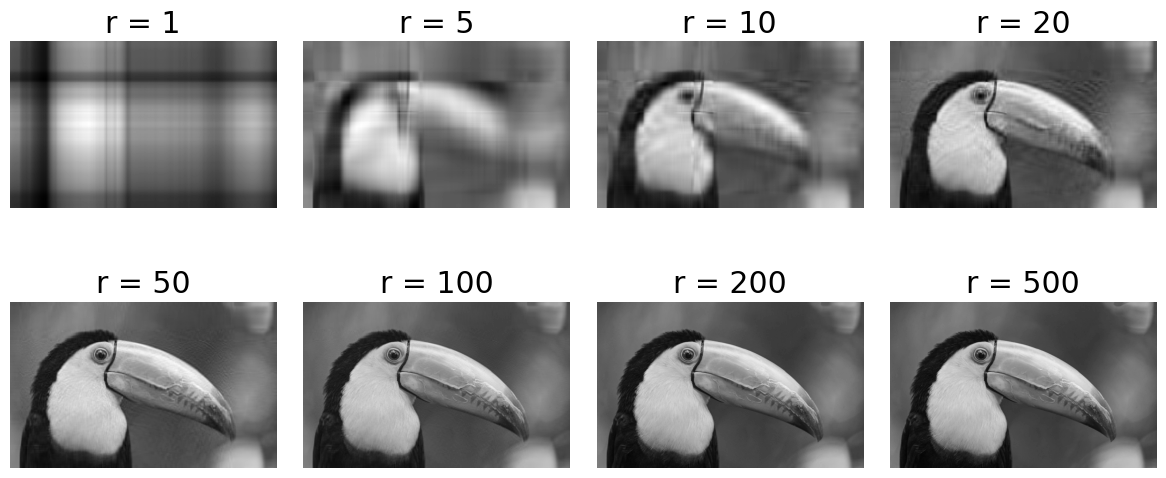

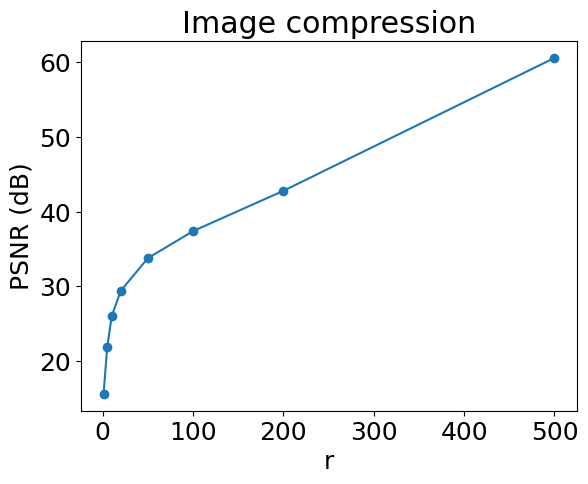

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def compress_image(image_path, r_values):
    # Load and convert the image to grayscale
    img = Image.open(image_path).convert('L')  
    img_arr = np.array(img)
    
    # SVD decomposition
    U, sigma, V = np.linalg.svd(img_arr, full_matrices=False)
    
    # PSNR values storage
    psnr_vals = []
    
    # Subplot for image outputs
    fig, axs = plt.subplots(2, 4, figsize=(12, 6))
    
    # Image reconstruction and PSNR calculation
    reconstructed_imgs = [U[:, :r] @ np.diag(sigma[:r]) @ V[:r, :] for r in r_values]
    mses = [np.mean((img_arr - rec_img) ** 2) for rec_img in reconstructed_imgs]
    psnr_vals = [10 * np.log10(np.max(img_arr) ** 2 / mse) for mse in mses]
    
    # Display reconstructed images
    [axs[idx // 4, idx % 4].imshow(rec_img, cmap='gray') for idx, rec_img in enumerate(reconstructed_imgs)]
    [axs[idx // 4, idx % 4].set_title('r = {}'.format(r)) for idx, r in enumerate(r_values)]
    [axs[idx // 4, idx % 4].axis('off') for idx in range(len(r_values))]
    
    plt.tight_layout()
    
    # PSNR diagram
    plt.figure()
    plt.plot(r_values, psnr_vals, '-o')
    plt.title('Image compression')
    plt.xlabel('r')
    plt.ylabel('PSNR (dB)')
    plt.show()

# Image path and r values
img_path = 'pic.jpg'
r_vals = [1, 5, 10, 20, 50, 100, 200, 500]

# Image compression and PSNR comparison
compress_image(img_path, r_vals)

###  part 2

Another issue that we can explore with a similar idea of applying base transform is removing noise from images. In the condition that the noise in the image is uniform and in such a way that it does not distort the general information in the image. from the point of view of SVD, according to the examination of the general information, the direction of the image vector on bases with larger singular values has not changed much, and removing the information related to Examining general information to vectors with less importance can remove noise and keep the main information of the image.
In this part, add two different noises salt and pepper and Gaussian noise with a desired and appropriate range to the image pic.jpg so that the PSNR of both images is in the same range, then perform the noise reduction process with the help of SVD analysis.
For both noises, draw the PSNR diagram in terms of different r.
  Then compare the results with the graph by plotting a number of outputs.
  Which of the noises is more effective in this method?


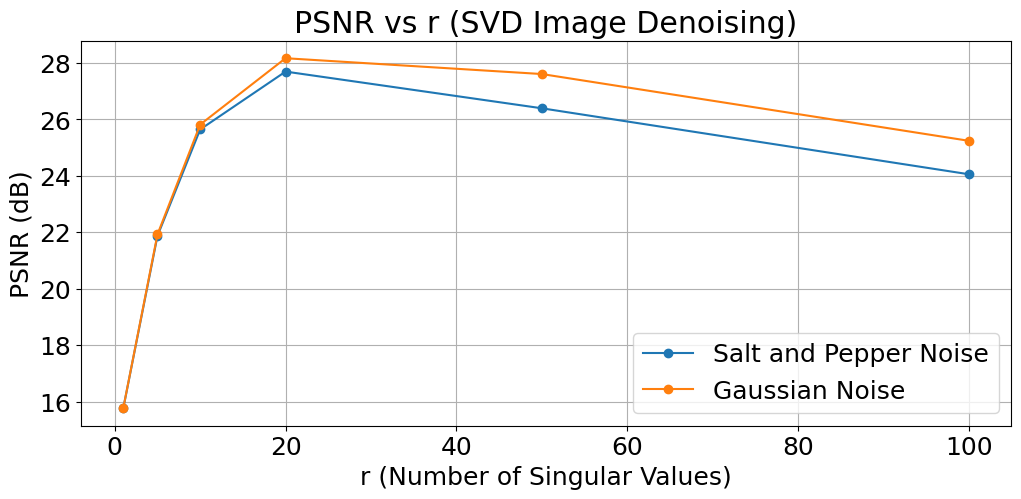

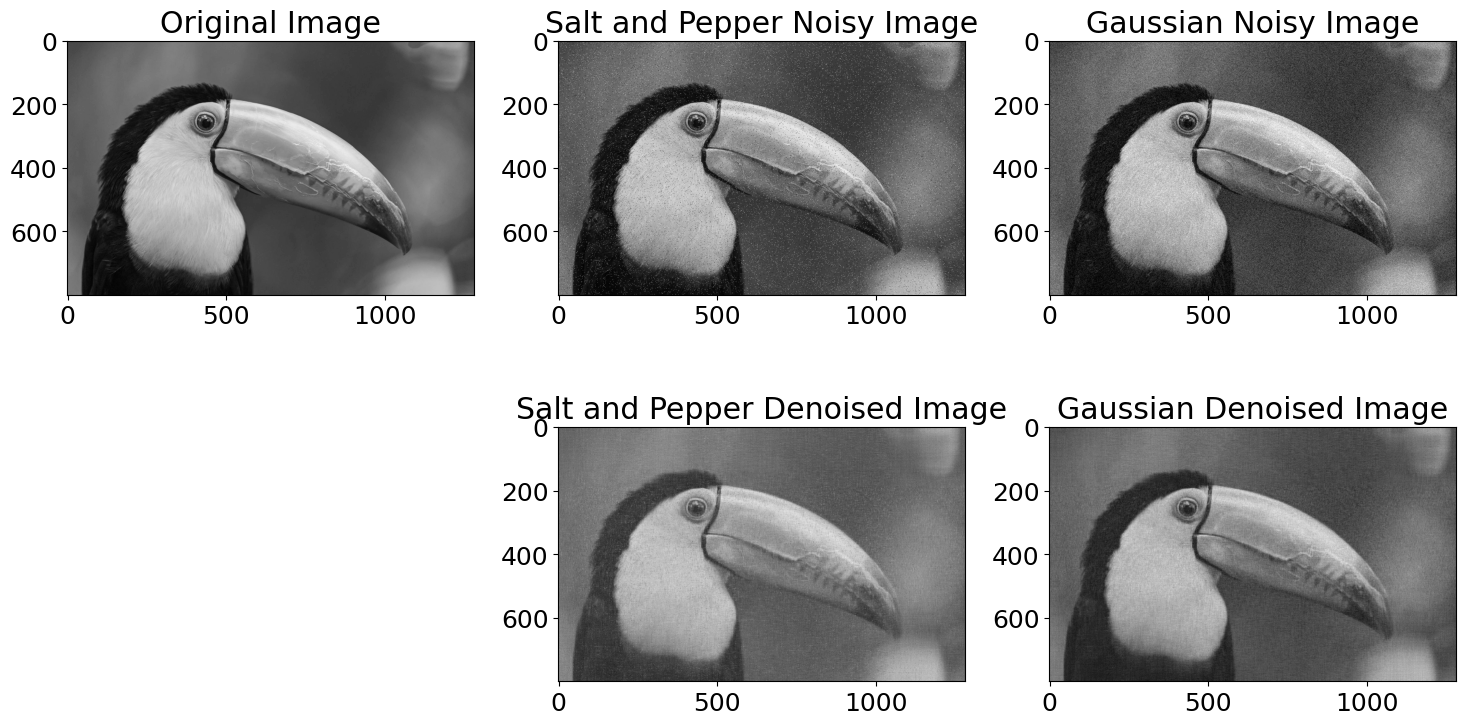

In [19]:
##Your Code start here
##Your Code start here
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_grayscale_image(file_path):
    return cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = image.copy()
    total_pixels = image.size

    # Salt noise
    num_salt = np.ceil(salt_prob * total_pixels)
    salt_coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255

    # Pepper noise
    num_pepper = np.ceil(pepper_prob * total_pixels)
    pepper_coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_image

def add_gaussian_noise(image, mean, std_dev):
    noisy_image = image + np.random.normal(mean, std_dev, image.shape)
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

def denoise_image_svd(noisy_image, r_values):
    psnr_values = []
    reconstructed_images = []

    for r in r_values:
        U, Sigma, Vt = np.linalg.svd(noisy_image, full_matrices=False)
        reconstructed_image = np.dot(U[:, :r], np.dot(np.diag(Sigma[:r]), Vt[:r, :]))
        mse = np.mean((original_image - reconstructed_image) ** 2)
        psnr_values.append(20 * np.log10(255 / np.sqrt(mse)))
        reconstructed_images.append(reconstructed_image)

    return psnr_values, reconstructed_images

file_path = 'pic.jpg'
original_image = read_grayscale_image(file_path)

salt_prob = 0.02
pepper_prob = 0.02
gaussian_mean = 0
gaussian_std_dev = 25

# Add Salt and Pepper noise
salt_pepper_noisy_image = add_salt_and_pepper_noise(original_image, salt_prob, pepper_prob)

# Add Gaussian noise
gaussian_noisy_image = add_gaussian_noise(original_image, gaussian_mean, gaussian_std_dev)

r_values = [1, 5, 10, 20, 50, 100]

# Perform denoising using SVD for salt and pepper noise
psnr_salt_pepper, reconstructed_images_salt_pepper = denoise_image_svd(salt_pepper_noisy_image, r_values)

# Perform denoising using SVD for Gaussian noise
psnr_gaussian, reconstructed_images_gaussian = denoise_image_svd(gaussian_noisy_image, r_values)

# Plot PSNR
plt.figure(figsize=(12, 5))
plt.plot(r_values, psnr_salt_pepper, marker='o', label='Salt and Pepper Noise')
plt.plot(r_values, psnr_gaussian, marker='o', label='Gaussian Noise')
plt.title('PSNR vs r (SVD Image Denoising)')
plt.xlabel('r (Number of Singular Values)')
plt.ylabel('PSNR (dB)')
plt.legend()
plt.grid(True)
plt.show()

# Display images
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(salt_pepper_noisy_image, cmap='gray')
plt.title('Salt and Pepper Noisy Image')

plt.subplot(2, 3, 3)
plt.imshow(gaussian_noisy_image, cmap='gray')
plt.title('Gaussian Noisy Image')

plt.subplot(2, 3, 5)
plt.imshow(reconstructed_images_salt_pepper[-1], cmap='gray')  # Display the last denoised image
plt.title('Salt and Pepper Denoised Image')

plt.subplot(2, 3, 6)
plt.imshow(reconstructed_images_gaussian[-1], cmap='gray')  # Display the last denoised image
plt.title('Gaussian Denoised Image')

plt.tight_layout()
plt.show()

##Your Code ends here
##Your Code ends here

##  Q3. PCA and Clustering <sub><sup>``(40 pt.)``</sup></sub>
In this problem we want to cluster some data points.
But first, you should reduce the number of features by the PCA algorithm then use kmeans clustering algorithm

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

### Import Dataset

In [5]:
Datapoint = pd.read_csv('Datapoint.csv')


### Correlation Heatmap

In this part plot the correlation Heatmap of features.
what is your suggestion about the number of principal components that they have high variance? Explain why.

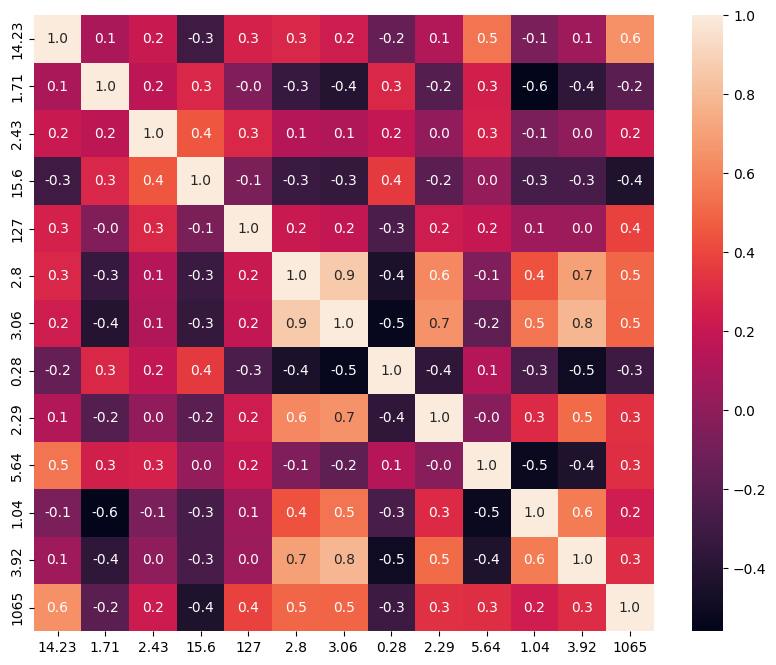

In [3]:
##Your Code start here
plt.figure(figsize=(10, 8))
sns.heatmap(Datapoint.corr(), annot=True, fmt='.1f')
plt.show()
##Your Code ends here

After examining the visual depiction of the correlation matrix, the extent of correlation becomes apparent. The primary components can be inferred from these values. Considering the color coding of each cell, values that are roughly above 0.7 could be regarded as similar, which includes about three cells in this range. As a result, there could be an estimation of 11 unique elements.

###  Data Preprocessing

In [6]:
Datapoint.head()


,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### PCA (Principal Component Analysis)
> As you know for applying PCA we should scale our data points.Here we use MinMax and Standard Scaler.
(First, use Standard Scaler)

Calculate principal components and plot Explained variance by each component.

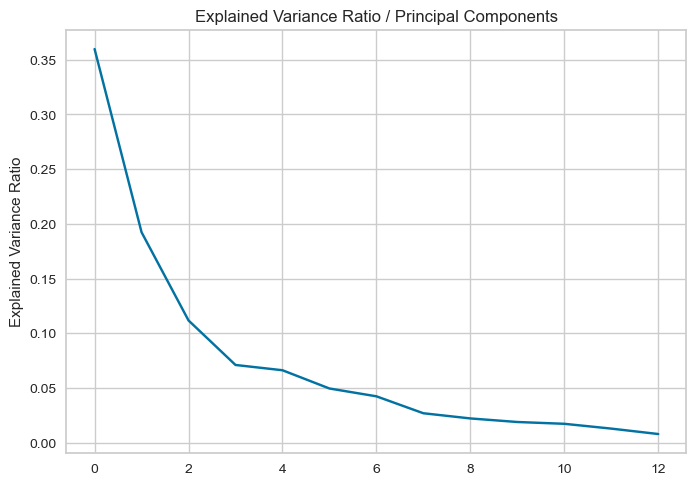

In [7]:
##Your Code start here
# Standardize the data
scaleData = pd.DataFrame(Datapoint).apply(lambda x: (x - np.mean(x)) / np.std(x))

# Calculate the covariance matrix
COV = scaleData.cov()

# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigval, eigvec = np.linalg.eig(COV)

# Sort the eigenvalues in descending order
index = np.argsort(eigval)[::-1]
eigval = eigval[index]
eigvec = eigvec[:, index]

# Calculate the explained variance ratio
EVR = eigval/np.sum(eigval)

# Plot the explained variance ratio for each principal component
plt.plot(EVR)
plt.title('Explained Variance Ratio / Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()
##Your Code ends here

Apply PCA Algorithm from scratch and reduce the number of features to the number you have guessed in previous parts.

In [8]:
##Your Code start here
# Standardize the data
standard = (Datapoint - np.mean(Datapoint, axis=0)) / np.std(Datapoint, axis=0)

# Calculate the covariance matrix and eigenvalues/eigenvectors of the standardized datapoint
COV = np.cov(standard, rowvar=False)
eigval, eigvec = np.linalg.eigh(COV)

# Sort the eigenvalues in descending order
index = np.argsort(eigval)[::-1]
eigval = eigval[index]
eigvec = eigvec[:,index]

# Calculate the cumulative sum of explained variance ratio
CVR = np.cumsum(eigval) / np.sum(eigval)

# Find the number of principal components that explain 90% of the variance
th = 0.9
num = np.argmax(CVR >= th) + 1

# Select the top principal components
bigEig = eigvec[:, :num]

# Reduce the dimensionality of the data using the selected principal components
reduData = np.dot(standard, bigEig)

# Print the number of original features, number of components, and explained variance ratio
print("Number of Original Features = ", standard.shape[1])
print("Number of Components =", num)
print("Explained Variance Ratio =", np.round(CVR[num - 1], 4))

# Project the standardized datapoint onto the selected principal components
pca_std_datapoint = reduData
##Your Code ends here

Number of Original Features =  13
Number of Components = 8
Explained Variance Ratio = 0.9205


### PCA plot in 2D
Plot data points using their two first features.What do you think about the number of clusters?

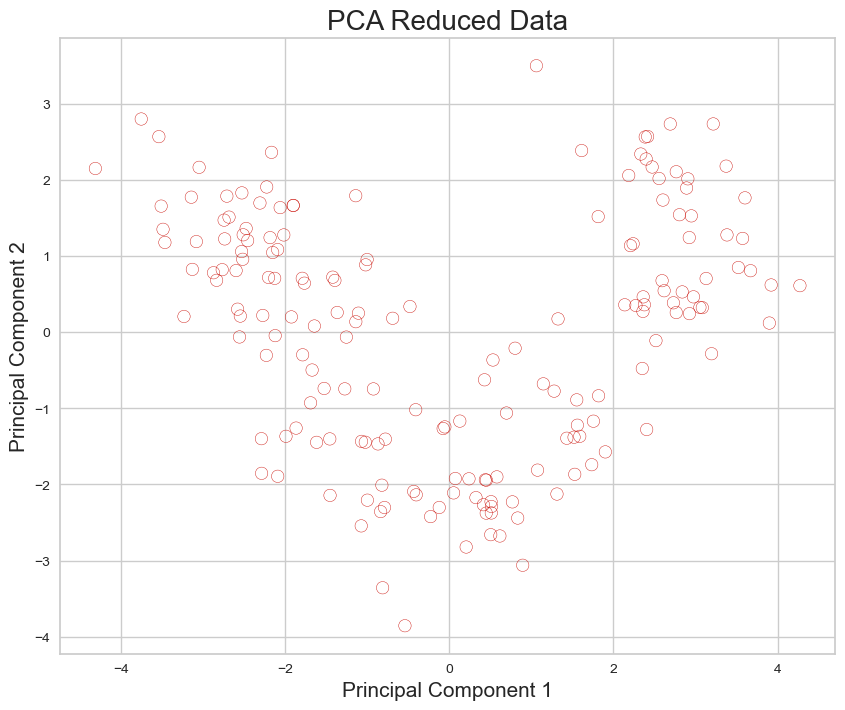

In [9]:
##Your Code start here
# Set the style of seaborn
sns.set_style("whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 8))  # Set the figure size
plt.scatter(pca_std_datapoint[:, 0], pca_std_datapoint[:, 1], marker='o', edgecolors='r', facecolors='none', s=80)

# Set the title and labels
plt.title('PCA Reduced Data', fontsize=20)
plt.xlabel('Principal Component 1', fontsize=15)
plt.ylabel('Principal Component 2', fontsize=15)

# Show the plot
plt.show()
##Your Code ends here

### Do all previous steps for MinMax Scaling
Tell your opinion about diffrences.




MinMax Scaling and Standard Scaling are two prevalent techniques utilized for data scaling prior to the application of Principal Component Analysis (PCA) or other machine learning algorithms. Here's a comprehensive comparison of these two methods:

1. **Scale Range:**
   - **MinMax Scaling (MinMaxScaler):** This method transforms the data to a specified range, typically [0, 1], by subtracting the minimum value and dividing by the range. It is useful when the range of the data is known and fixed. However, it can be distorted by outliers as they can change the minimum and maximum values and reduce the range of the scaled data.
   - **Standard Scaling (StandardScaler):** This method standardizes the data to have a mean of 0 and a standard deviation of 1, by subtracting the mean and dividing by the standard deviation. It is useful when the data is normally distributed and is more robust to outliers than MinMax Scaling.

2. **Impact on Outliers:**
   - **MinMax Scaling:** This method is sensitive to the presence of outliers, as it compresses all inliers into a narrow range, leading to loss of information and lower variance.
   - **Standard Scaling:** This method is less influenced by outliers, as it uses the mean and standard deviation, which are less sensitive to extreme values. This can preserve more information and higher variance.

3. **Interpretability:**
   - **MinMax Scaling:** This method maintains the original range of the data, which can be useful if the features have a natural or meaningful scale. However, it changes the range of the data, which can make it harder to interpret the features in their original scale.
   - **Standard Scaling:** This method transforms the data to have a mean of 0 and a standard deviation of 1, which can make it easier to compare the features in terms of standard deviations from the mean, which can be useful for identifying outliers or anomalies.

4. **Algorithm Sensitivity:**
   - **MinMax Scaling:** This method is recommended for algorithms that depend on distances or gradients, such as k-nearest neighbors, gradient descent, or neural networks. These algorithms can perform better when the features are scaled to the same range and have similar magnitudes.
   - **Standard Scaling:** This method is generally a safe option for various algorithms, especially those that assume a normal or Gaussian distribution of features, such as linear regression, logistic regression, or support vector machines. These algorithms can benefit from having the features standardized to have zero mean and unit variance.

5. **Use Cases:**
   - **MinMax Scaling:** This method is suitable when the features have a clear minimum and maximum value and you want to preserve the relative order of the values. For example, if the features are ratings or scores, MinMax Scaling can keep them in the same scale and reflect their differences.
   - **Standard Scaling:** This method is appropriate when the features have different units or scales and you want to ensure that they have equal weight in the analysis. For example, if the features are height, weight, and age, Standard Scaling can make them comparable and avoid bias.

In conclusion, the choice between MinMax Scaling and Standard Scaling depends on the specific requirements of the machine learning algorithm and the characteristics of the data, such as the presence of outliers and the assumption of the data distribution.

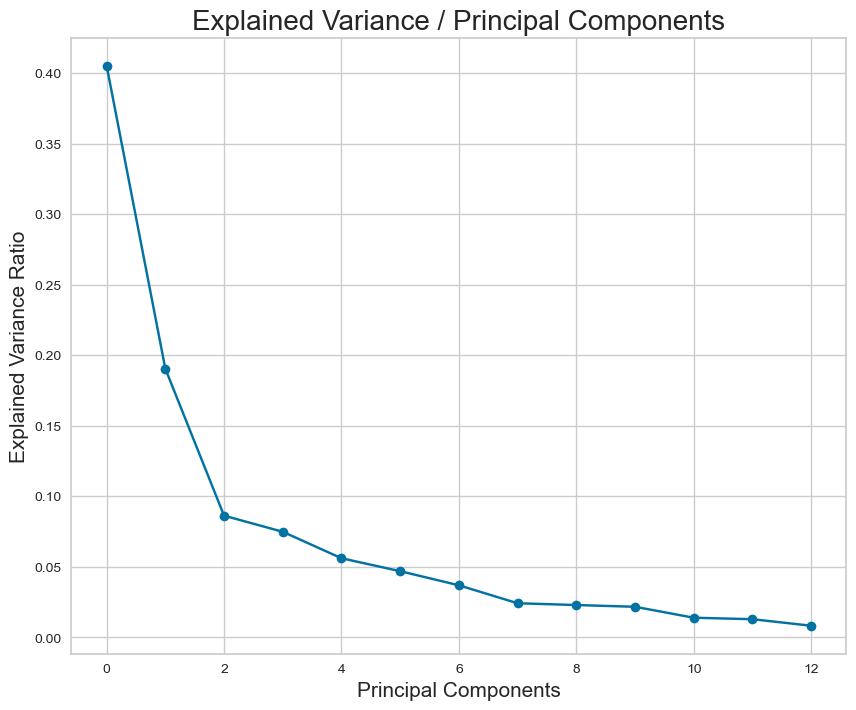

In [10]:
##Your Code start here
# Scale the data using MinMaxScaler
scaleData = pd.DataFrame(Datapoint).apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

# Calculate the covariance matrix
COV = scaleData.cov()

# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigval, eigvec = np.linalg.eig(COV)

# Sort the eigenvalues in descending order
index = np.argsort(eigval)[::-1]
eigval = eigval[index]
eigvec = eigvec[:, index]

# Calculate the explained variance ratio
EVR = eigval/np.sum(eigval)

# Plot the explained variance ratio for each principal component

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a plot
plt.figure(figsize=(10, 8))  # Set the figure size
plt.plot(EVR, marker='o', linestyle='-', color='b')  # Add markers and change line style

# Set the title and labels
plt.title('Explained Variance / Principal Components', fontsize=20)
plt.xlabel('Principal Components', fontsize=15)
plt.ylabel('Explained Variance Ratio', fontsize=15)

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()
##Your Code ends here

as we can see in the plot above we have 3 clusters

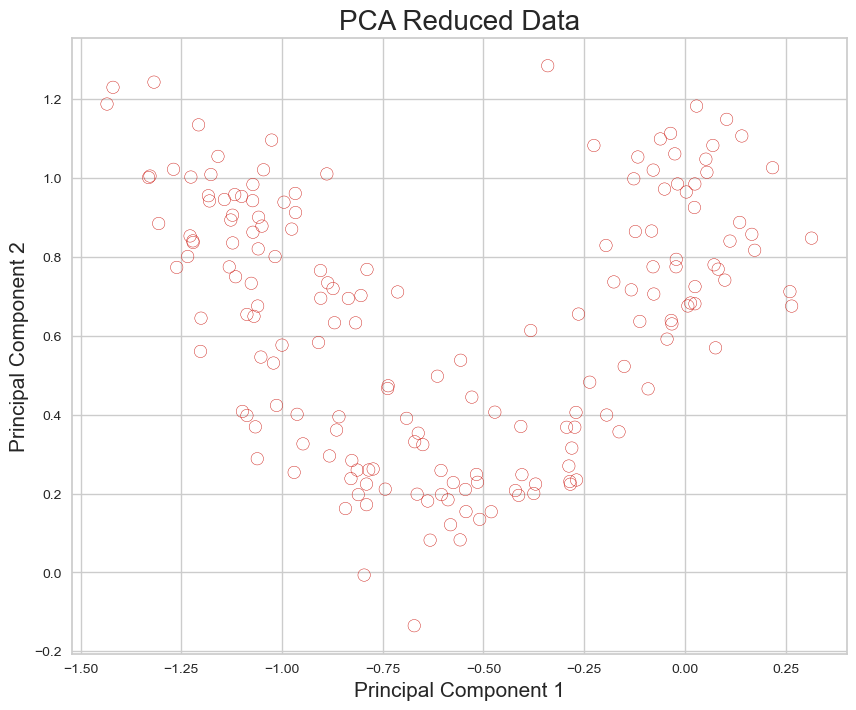

In [11]:
##Your Code start here

# Scale the data using pandas
scaleM = pd.DataFrame(Datapoint).apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

# Calculate the covariance matrix and eigenvalues/eigenvectors of the scaled data
COV = np.cov(scaleM, rowvar=False)
eigval, eigvec = np.linalg.eigh(COV)

# Sort the eigenvalues in descending order
index = np.argsort(eigval)[::-1]
eigval = eigval[index]
eigvec = eigvec[:, index]

# Select the top principal components
bigEig = eigvec[:, :num]

# Project the scaled data onto the selected principal components
pca_minmax_scaling = np.dot(scaleM, bigEig)

# Create a scatter plot
plt.figure(figsize=(10, 8))  # Set the figure size
plt.scatter(pca_minmax_scaling[:, 0], pca_minmax_scaling[:, 1], marker='o', edgecolors='r', facecolors='none', s=80)

# Set the title and labels
plt.title('PCA Reduced Data', fontsize=20)
plt.xlabel('Principal Component 1', fontsize=15)
plt.ylabel('Principal Component 2', fontsize=15)

# Show the plot
plt.show()
##Your Code ends here

### KMeans Clustering
#### Elbow Method for Determining Cluster Amount on  Dataset

Using the elbow method to find the optimal number of clusters

d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

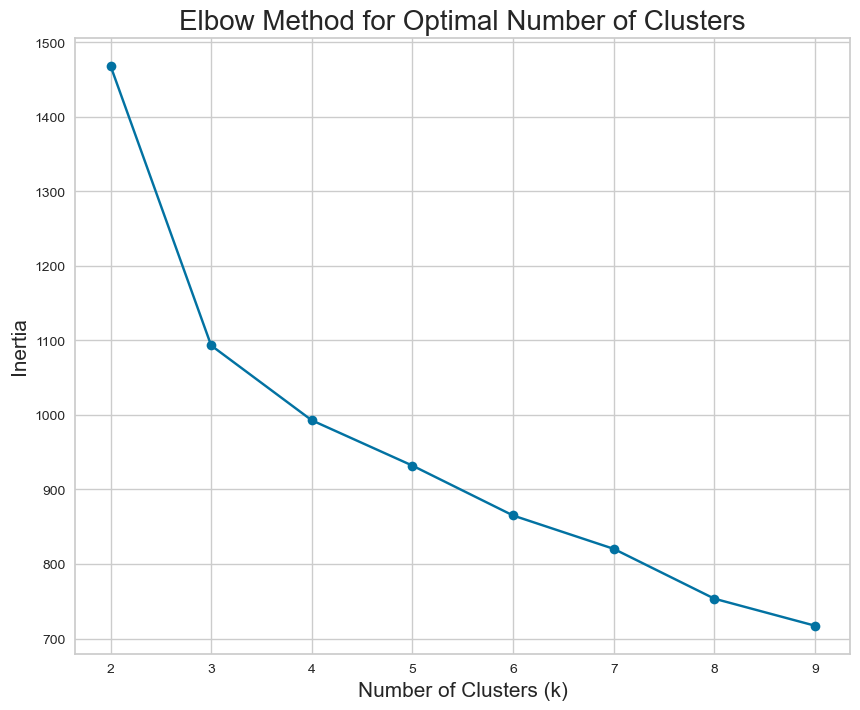

In [12]:
##Your Code start here
# Initialize the list to store inertia values
inertia = []

# Use list comprehension to fit KMeans and get inertia values
inertia = [KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17).fit(pca_std_datapoint).inertia_ for i in range(2, 10)]

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a plot
plt.figure(figsize=(10, 8))  # Set the figure size
plt.plot(range(2, 10), inertia, 'o-', color='b')  # Add markers to the line plot

# Set the title and labels
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=20)
plt.xlabel('Number of Clusters (k)', fontsize=15)
plt.ylabel('Inertia', fontsize=15)

# Show the plot
plt.show()
##Your Code ends here

What is inertia and silhouette metrics?
Explain them briefly.




Inertia:
In the realm of clustering, inertia serves as a measure to assess the quality of a clustering algorithm. It's computed as the sum of squared distances from each data point to the center of its designated cluster. Inertia gauges the internal consistency of clusters; clusters are more compact when inertia values are lower. However, solely relying on inertia isn't enough to ascertain the ideal number of clusters, as it generally decreases with an increase in the number of clusters. Hence, it's often paired with other metrics like the silhouette score to determine the suitable number of clusters.

Silhouette Score:
The silhouette score is a metric that evaluates how similar a data point is to its own cluster (cohesion) in comparison to other clusters (separation). It measures the quality of the clusters by taking into account the distance between data points and the separation between different clusters. The silhouette score varies from -1 to 1, where a high value signifies that the data point fits well within its own cluster and is distinct from other clusters. A value nearing 1 indicates that the data point is well-clustered, while a value close to -1 implies that the data point might be incorrectly clustered. The silhouette score is a valuable tool for evaluating the suitability of the clustering structure and can assist in identifying the optimal number of clusters.

In [13]:
#You should save your final datapoints in pca_std_datapoint variable
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    inertia.append(kmeans.inertia_)

  0%|          | 0/8 [00:00<?, ?it/s]d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 12%|█▎        | 1/8 [00:00<00:03,  2.13it/s]d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 25%|██▌       | 2/8 [00:01<00:03,  1.93it/s]d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 38%|███▊      | 3/8 [00:01<00:02,  1.91it

In [14]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    silhouette[i] = sil(pca_std_datapoint, kmeans.labels_, metric='euclidean')

  0%|          | 0/8 [00:00<?, ?it/s]d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 12%|█▎        | 1/8 [00:00<00:03,  2.19it/s]d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 25%|██▌       | 2/8 [00:00<00:02,  2.12it/s]d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 38%|███▊      | 3/8 [00:01<00:02,  1.96it

Plot the **inertia** and **silhouette ** values

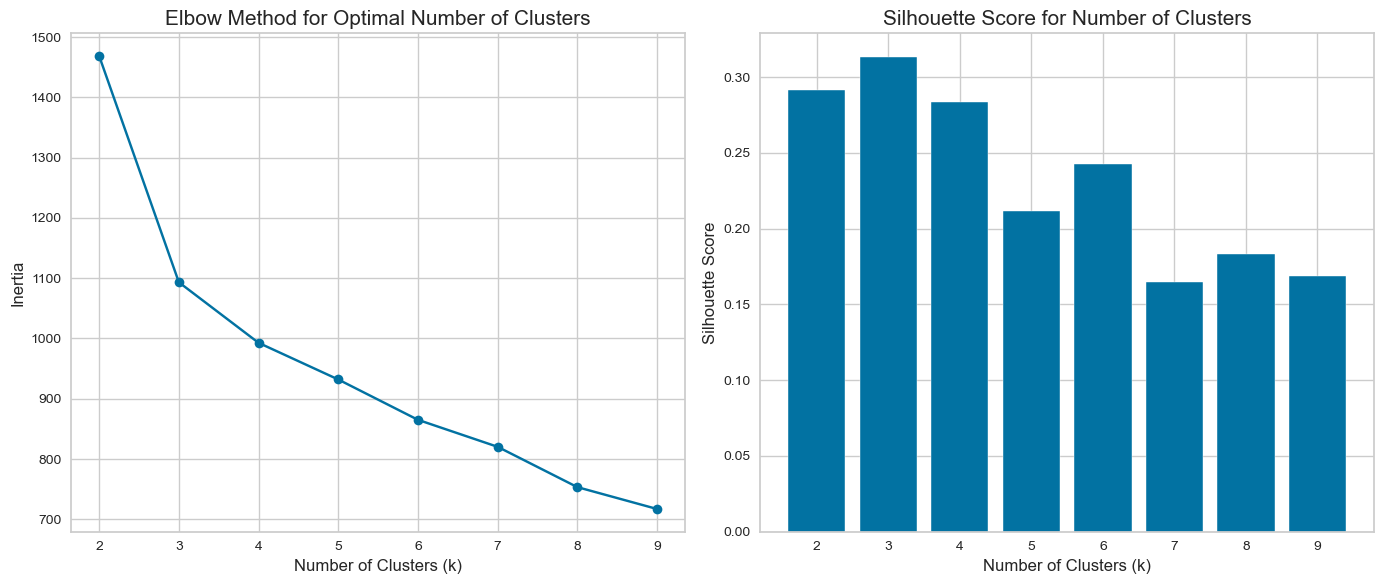

In [19]:
##Your Code start here
# Set the style of seaborn
sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot inertia values
axs[0].plot(range(2, 10), inertia, 'o-', color='b')  # Add markers to the line plot
axs[0].set_title('Elbow Method for Optimal Number of Clusters', fontsize=15)
axs[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axs[0].set_ylabel('Inertia', fontsize=12)

# Plot silhouette scores
axs[1].bar(range(len(silhouette)), list(silhouette.values()), color='b')
axs[1].set_xticks(range(len(silhouette)))
axs[1].set_xticklabels(list(silhouette.keys()))
axs[1].set_title('Silhouette Score for Number of Clusters', fontsize=15)
axs[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axs[1].set_ylabel('Silhouette Score', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
##Your Code ends here

Tune the hyper parameters based on your conclusions.

In [20]:
k = 3
model_kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_std_datapoint)

d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#Now plot the datapoints usig two first features
(Each cluster in a different colour)

NameError: name 'u_labels' is not defined

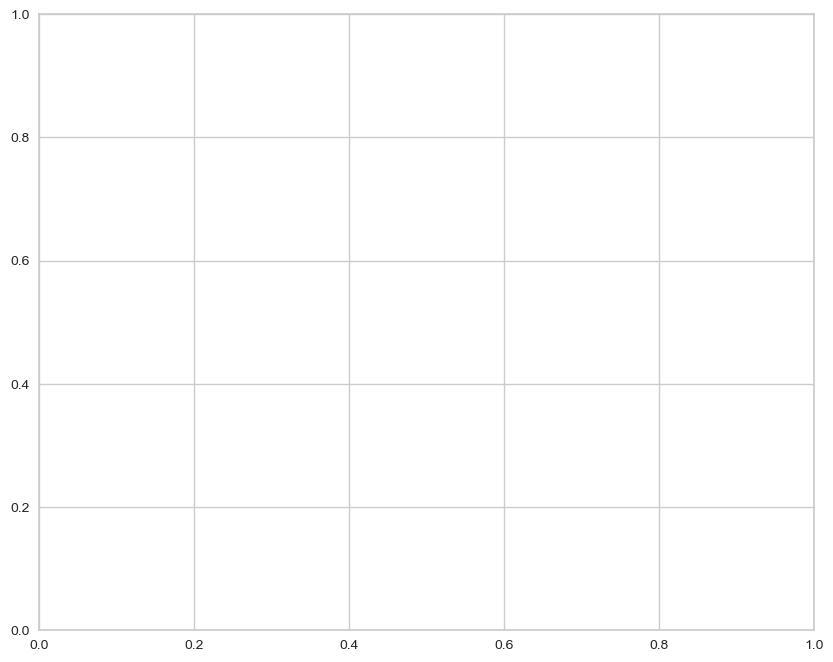

In [21]:

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 8))  # Set the figure size

# Plot each cluster
for i, label in enumerate(u_labels):
    cluster_data = pca_std_datapoint[y_predict_kmeans == label]
    centroid = centroids[label]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], color=cmap(i), label = f'Cluster {label+1}')
    ax.scatter(centroid[0], centroid[1], s = 200, color=cmap(i+k), edgecolors='black', linewidths=2, label = f'Center {label+1}')

# Set the title and labels
ax.set_title('KMeans Clustering', fontsize=20)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)

# Add a legend
ax.legend(loc='best', fontsize='medium')

# Show the plot
plt.show()

Do all previous steps for MinMax scaled data points.





  0%|          | 0/8 [00:00<?, ?it/s]d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 12%|█▎        | 1/8 [00:00<00:03,  1.94it/s]d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 25%|██▌       | 2/8 [00:01<00:03,  1.89it/s]d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 38%|███▊      | 3/8 [00:01<00:02,  1.82it

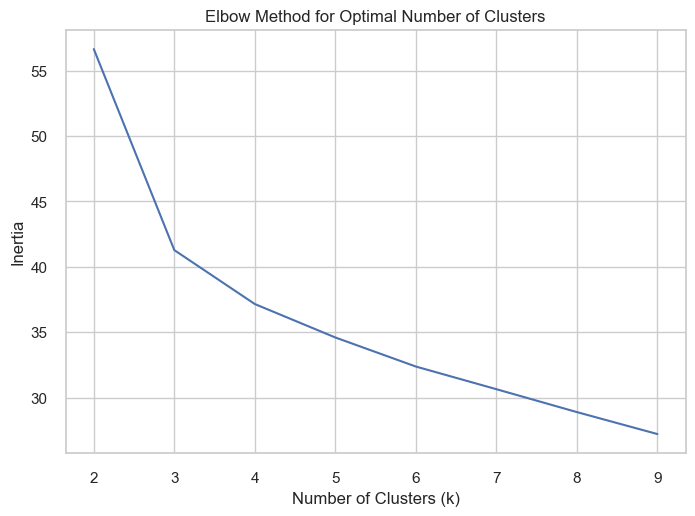

  0%|          | 0/8 [00:00<?, ?it/s]d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 12%|█▎        | 1/8 [00:00<00:03,  1.94it/s]d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 25%|██▌       | 2/8 [00:01<00:03,  1.95it/s]d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
 38%|███▊      | 3/8 [00:01<00:02,  1.95it

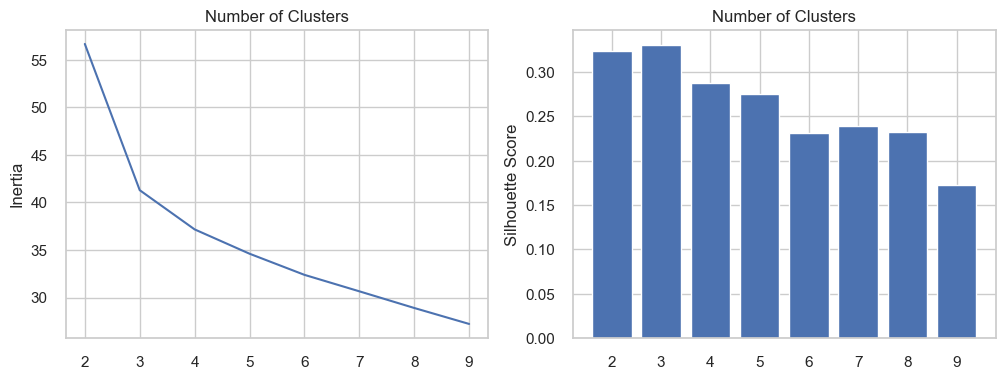

d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


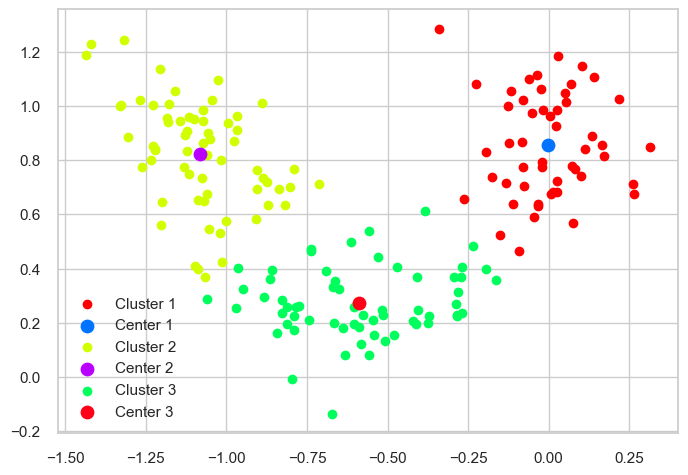

In [24]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_minmax_scaling)
    inertia.append(kmeans.inertia_)


plt.plot(range(2,10), inertia)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')

plt.ylabel('Inertia')
plt.show()

silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_minmax_scaling)
    silhouette[i] = sil(pca_minmax_scaling, kmeans.labels_, metric='euclidean')

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(range(2, 10), inertia)
axs[0].set_title('Number of Clusters')
axs[0].set_ylabel('Inertia')
axs[0].grid(True)

axs[1].bar(silhouette.keys(), silhouette.values())
axs[1].set_title('Number of Clusters')
axs[1].set_ylabel('Silhouette Score')
axs[1].grid(True)

plt.show()


k = 3
model_kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_minmax_scaling)


u_labels = np.unique(y_predict_kmeans)
cmap = plt.get_cmap('hsv', 2*k)
centroids = model_kmeans.cluster_centers_
for i in u_labels:
    plt.scatter(pca_minmax_scaling[y_predict_kmeans == i , 0] , pca_minmax_scaling[y_predict_kmeans == i , 1] ,color=cmap(i), label = 'Cluster '+str(i+1))
    plt.scatter(centroids[i,0] , centroids[i,1] , s = 80, color=cmap(i+k),label = 'Center '+str(i+1))

plt.legend()
plt.show()

Compare the results of different scaling methods in a PCA problem

There's a minor numerical variation in the relative placement of the data and its clustering.